# Modelo de regresión lineal múltiple con errores normales

Sea $n\in \mathbb{N}$, $\pmb{X}$ matriz de constantes $n\times(k+1)$ dimensional con rango $k+1<n$, $\pmb{\beta}=(\beta_0,\beta_1, \ldots , \beta_k)'\in \mathbb{R}^{k+1}$ y $\sigma^2\in \mathbb{R}$. Consideramos el modelo
\begin{equation*}
\pmb{y}\sim N_n(\pmb{X}\pmb{\beta},\sigma^2\pmb{I}),
\end{equation*}
equivalentemente
\begin{equation*}
\pmb{y}=\pmb{X}\pmb{\beta} +\pmb{\epsilon}
\end{equation*}
con 
\begin{equation*}
\pmb{\epsilon}\sim N_n(\pmb{0},\sigma^2\pmb{I}),
\end{equation*}

En clase vimos que los estimadores máximo verosimil para $\pmb{\theta}=(\pmb{\beta},\sigma^2)$ son $\hat{\pmb{\theta}}=(\hat{\pmb{\beta}},\hat{\sigma}^2)$ con

\begin{align*}
\hat{\pmb{\beta}} & = (\pmb{X}'\pmb{X})^{-1}\pmb{X}'\pmb{y}
\\
\hat{\sigma}^2 & = \frac{1}{n}(\pmb{y}-\pmb{X}\hat{\pmb{\beta}})'(\pmb{y}-\pmb{X}\hat{\pmb{\beta}})
\end{align*}

Por ejemplo, consideramos
\begin{equation*}
\pmb{X}=\left( \begin{matrix} 1 & x_1 & x_1^2 & x_1^3 & x_1^4 \\ 1 & x_2 & x_2^2 & x_2^3 & x_2^4 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3 & x_n^4 
\\ \end{matrix}\right)
\end{equation*}
y
\begin{equation*}
\pmb{\beta}=\left( \begin{matrix} 1.1 \\ -2.5 \\ 11 \\ -18 \\ 10 \end{matrix} \right)
\end{equation*}

In [5]:
using Distributions # Paquete con distribuciones de probabilidad
n = 100 # Consideramos 100 observaciones
β = [ 1.1, -2.5, 11.0, -18.0, 10.0] # Vector β
x = rand(Uniform(),n) # n puntos aleatorios uniformes en (0,1), esta sería la primer columna de la matriz X arriba
X = zeros(n,5) # Matriz de ceros para construir X
for i in 1:n 
    X[i,:] = [ 1, x[i], x[i]^2, x[i]^3, x[i]^4 ] # iteramos para construir renglones de X
end
X

100×5 Array{Float64,2}:
 1.0  0.0751632  0.00564951  0.000424635  3.19169e-5 
 1.0  0.970433   0.94174     0.913895     0.886874   
 1.0  0.516609   0.266885    0.137875     0.0712277  
 1.0  0.95873    0.919163    0.881228     0.84486    
 1.0  0.725705   0.526648    0.382191     0.277358   
 1.0  0.260591   0.0679079   0.0176962    0.00461148 
 1.0  0.94333    0.889872    0.839443     0.791873   
 1.0  0.318422   0.101393    0.0322856    0.0102805  
 1.0  0.928333   0.861803    0.80004      0.742704   
 1.0  0.736149   0.541915    0.39893      0.293672   
 1.0  0.951602   0.905545    0.861718     0.820013   
 1.0  0.131648   0.0173311   0.0022816    0.000300367
 1.0  0.424466   0.180171    0.0764766    0.0324617  
 ⋮                                                   
 1.0  0.357086   0.12751     0.0455321    0.0162589  
 1.0  0.168822   0.0285007   0.00481154   0.000812293
 1.0  0.598327   0.357995    0.214198     0.12816    
 1.0  0.829282   0.687709    0.570305     0.472943   
 1.0

In [27]:
ϵ = rand(Normal(0,0.05),n) # Vector de errores normales con media μ=0 y varianza σ²=0.01
y = X * β + ϵ # Observaciones provenientes del modelo
β_ml = ( X' * X)^(-1) * X' * y

5-element Array{Float64,1}:
   1.083888379682323 
  -2.4028418162868106
  10.860178346395301 
 -18.02078565589942  
  10.109959797886674 

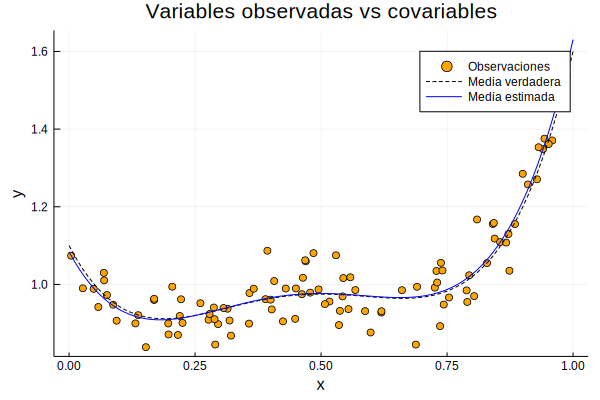

In [32]:
using Plots # Paquete para producir imágenes
f(x) = β[1] + β[2]*x + β[3]*x^2 + β[4]*x^3 + β[5]*x^4 # Media polinomial verdadera
f_ml(x) = β_ml[1] + β_ml[2]*x + β_ml[3]*x^2 + β_ml[4]*x^3 + β_ml[5]*x^4 # Media polinomial dada por máxima verosimilitud
mesh = collect(0.0:1.0/100.0:1.0)
scatter(x,y,color="orange",label="Observaciones")
plot!(mesh,f.(mesh), color = :black, linestyle=:dash ,label="Media verdadera")
plot!(mesh,f_ml.(mesh), color = :blue, label="Media estimada")
ylabel!("y")
xlabel!("x")
title!("Variables observadas vs covariables")

**Teorema** Sean $\hat{\pmb{\beta}},\hat{\sigma}^2$ los estimadores máximo verosimil en el modelo de regresión lineal múltiple con errores normales, entonces

i) $\hat{\pmb{\beta}}\sim N_{k+1}(\pmb{\beta},\sigma^2(\pmb{X}'\pmb{X})^{-1})$.

ii) $\frac{n\hat{\sigma}^2}{\sigma^2}\sim \chi^2(n-k-1)$.

iii) $\hat{\pmb{\beta}}$ y $\hat{\sigma}^2$ son independientes.

**dem.**

i) $\hat{\pmb{\beta}}=\pmb{A}\pmb{y}$ con $\pmb{A}=(\pmb{X}'\pmb{X})^{-1}\pmb{X}'$, entonces, por teorema anteriormente visto en clase, $\hat{\pmb{\beta}}\sim N_{k+1}(\pmb{A}\esp{y},\pmb{A}\,\text{cov}(y)\pmb{A}')$. $\pmb{A}\esp{\pmb{y}}=\pmb{A}X\pmb{\beta}=\pmb{\beta}$ por otro lado $\pmb{A}\,\text{cov}(y)\pmb{A}'=\sigma^2\pmb{A}\pmb{A}'= \sigma^2(\pmb{X}'\pmb{X})^{-1}$ entonces $\hat{\pmb{\beta}}\sim N_{k+1}(\pmb{\beta},\sigma^2(\pmb{X}'\pmb{X})^{-1})$.

ii) Sabemos que si $\pmb{y}\sim N_p(\pmb{\mu},\pmb{\Sigma})$ entonces $\pmb{y}'\pmb{A}\pmb{y}\sim \chi^2\left( r,\frac{\pmb{\mu}'\pmb{A}\pmb{\mu}}{2\sigma^2} \right)$ si sólo si $\pmb{A}$ es idempotente de rango $r$. Tenemos que $n\hat{\sigma}^2= \pmb{y}'\left( \pmb{I} - \pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)\pmb{y}$; al ser $\left(\pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)^2$ idempotente se sigue que $\left( \pmb{I} - \pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)$ es idempotente, de lo cual también se tiene que $\text{rango}\left( \pmb{I} - \pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)=\text{tr}\left( \pmb{I} - \pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)=n-\text{tr}\left( (\pmb{X}'\pmb{X})^{-1}\pmb{X}'\pmb{X}\right)=n-(k+1)$. Esto concluye ii).

iii) Sabemos que si $\pmb{y}\sim N_p(\pmb{\mu},\pmb{\Sigma})$ entonces $\pmb{y}'\pmb{A}\pmb{y}$ es independiente de $\pmb{B}\pmb{y}$ si sólo si $\pmb{B}\pmb{\Sigma}\pmb{A}=\pmb{0}$. Tenemos que $\hat{\pmb{\beta}}=\pmb{B}\pmb{y}$ con $\pmb{B}=(\pmb{X}'\pmb{X})^{-1}\pmb{X}'$ y $n\hat{\sigma}^2= \pmb{y}'\left( \pmb{I} - \pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)\pmb{y}$, por lo que basta ver que 
$\pmb{B}\pmb{A}=(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\left( \pmb{I} - \pmb{X}(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\right)=
(\pmb{X}'\pmb{X})^{-1}\pmb{X}' - (\pmb{X}'\pmb{X})^{-1}\pmb{X}' =\pmb{0}.
$

## Coeficiente de determinación 

Recordemos que 

$SST=\sum_{i=1}^n (y_i-\bar{y})^2=(\pmb{y}-\bar{y}\pmb{j})'(\pmb{y}-\bar{y}\pmb{j})$

$SSE=\sum_{i=1}^n (y_i-\hat{y}_i)^2= (\pmb{y}-\hat{\pmb{y}})'(\pmb{y}-\hat{\pmb{y}})$

$SSR=\sum_{i=1}^n (\hat{y}_i-\bar{y})^2=(\hat{ \pmb{y} }-\bar{y}\pmb{j})'(\hat{ \pmb{y} }-\bar{y}\pmb{j})$

son tales que 

$SST=SSE+SSR$

Habíamos